In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
X=df.drop('math_score',axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y=df['math_score']

In [9]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
categorical_features=[features for features in X.columns if X[features].dtype=='O']
numerical_features=[features for features in X.columns if X[features].dtype!='O']

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [12]:
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

In [13]:
preprocessor=ColumnTransformer(
[
    ("OneHotEncoding",cat_transformer,categorical_features),
    ("StandardScaler",num_transformer,numerical_features)],
)

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def evalute_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mse,mae,rmse,r2
    

In [18]:
models={
"Linearregression":LinearRegression(),
"ridge":Ridge(),
"Lasso":Lasso(),
"KNeighborsRegressor":KNeighborsRegressor(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"RandomForestRegressor":RandomForestRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"SVR":SVR(),
"CatBoostRegressor":CatBoostRegressor(),
"XGBRegressor":XGBRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor()
}

In [19]:
model_list=[]
r2_list=[]

In [20]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_test_predict=model.predict(X_test)
    y_train_predict=model.predict(X_train)
    model_train_mse,model_train_mae,model_train_rmse,r2_score_train=evalute_model(y_train,y_train_predict)
    model_test_mse,model_test_mae,model_test_rmse,r2_score_test=evalute_model(y_test,y_test_predict)
    model_list.append(list(models.keys())[i])
    r2_list.append(r2_score_test)

Learning rate set to 0.038699
0:	learn: 14.9108629	total: 55.3ms	remaining: 55.2s
1:	learn: 14.5502056	total: 55.7ms	remaining: 27.8s
2:	learn: 14.1768171	total: 56.1ms	remaining: 18.6s
3:	learn: 13.8105721	total: 56.5ms	remaining: 14.1s
4:	learn: 13.4675714	total: 57.1ms	remaining: 11.4s
5:	learn: 13.1371876	total: 57.6ms	remaining: 9.54s
6:	learn: 12.8360023	total: 58ms	remaining: 8.22s
7:	learn: 12.5500833	total: 58.3ms	remaining: 7.23s
8:	learn: 12.2906159	total: 58.6ms	remaining: 6.45s
9:	learn: 11.9981775	total: 58.9ms	remaining: 5.83s
10:	learn: 11.7047888	total: 59.2ms	remaining: 5.32s
11:	learn: 11.4391456	total: 59.6ms	remaining: 4.91s
12:	learn: 11.2125278	total: 60ms	remaining: 4.55s
13:	learn: 10.9536785	total: 60.4ms	remaining: 4.25s
14:	learn: 10.7143038	total: 60.7ms	remaining: 3.99s
15:	learn: 10.4790983	total: 61ms	remaining: 3.75s
16:	learn: 10.2536845	total: 61.4ms	remaining: 3.55s
17:	learn: 10.0510167	total: 61.8ms	remaining: 3.37s
18:	learn: 9.8311467	total: 62.1

In [21]:
results_df = pd.DataFrame({
    "model_name": model_list,
    "r2_score": r2_list
}).sort_values(by="r2_score", ascending=False)
print(results_df)

                   model_name  r2_score
0            Linearregression  0.839422
1                       ridge  0.839036
10  GradientBoostingRegressor  0.817777
8           CatBoostRegressor  0.810060
5       RandomForestRegressor  0.793009
3         KNeighborsRegressor  0.774435
6           AdaBoostRegressor  0.774051
9                XGBRegressor  0.772410
7                         SVR  0.765941
2                       Lasso  0.760917
4       DecisionTreeRegressor  0.694885


Text(0, 0.5, 'predicted')

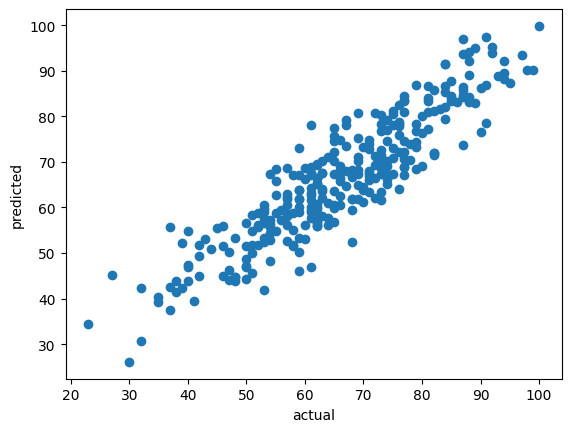

In [25]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('actual')
plt.ylabel('predicted')
